In [3]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Seed random number generator
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [5]:
# Import iexfinance and get_historical_data
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
# Set tickers
tickers = ["SPY", "AGG"]
# Set start and end date
end_date = datetime.now()
start_date = end_date + timedelta(-1825)
# Fetch 5 years of historical returns for SPY and AGG
df = get_historical_data(tickers, start_date, end_date, output_format='pandas')
df.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2014-08-29  200.45  200.73  199.82  200.71   65906598  110.00  110.09  109.94   
2014-09-02  200.97  201.00  199.86  200.61   72425793  109.55  109.63  109.45   
2014-09-03  201.38  201.41  200.22  200.50   57461742  109.39  109.58  109.37   
2014-09-04  200.84  201.58  199.66  200.21   85236442  109.44  109.54  109.31   
2014-09-05  200.17  201.19  199.41  201.11  102176784  109.44  109.54  109.29   

                             
             close   volume  
date                         
2014-08-29  109.98  1473300  
2014-09-02  109.45  1029287  
2014-09-03  109.57  1311668  
2014-09-04  109.43  1308945  
2014-09-05  109.37   798456

In [7]:
# Drop extraneous columns
df.drop(columns = ['open', 'high', 'low', 'volume'], level = 1, inplace = True)
df.head()

,SPY,AGG
,close,close
date,,
2014-08-29,200.71,109.98
2014-09-02,200.61,109.45
2014-09-03,200.50,109.57
2014-09-04,200.21,109.43
2014-09-05,201.11,109.37


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [8]:
# Calculate the daily returns for SPY and AGG
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2014-08-29,NaN,NaN
2014-09-02,-0.000498,-0.004819
2014-09-03,-0.000548,0.001096
2014-09-04,-0.001446,-0.001278
2014-09-05,0.004495,-0.000548


In [9]:
# Calculate the value of Average Daily Returns
avg_daily_returns_spy = daily_returns.mean()['SPY']['close']
avg_daily_returns_agg = daily_returns.mean()['AGG']['close']
print(f"Average daily returns of SPY: {avg_daily_returns_spy}")
print(f"Average daily returns of AGG: {avg_daily_returns_agg}")

Average daily returns of SPY: 0.0003217726300116494
Average daily returns of AGG: 3.1232894286848156e-05


In [10]:
# Calculate volatility
std_daily_returns_spy = daily_returns.std()['SPY']['close']
std_daily_returns_agg = daily_returns.std()['AGG']['close']
print(f"SPY standard deviation of daily returns: {std_daily_returns_spy}")
print(f"AGG standard deviation of daily returns: {std_daily_returns_agg}")

SPY standard deviation of daily returns: 0.008637830433263967
AGG standard deviation of daily returns: 0.0020111233447447723


In [11]:
# Save the last day's closing price
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [12]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_of_trading_days = 252 * 30
monte_carlo_simulated_prices = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()
simulation = 0

In [13]:
# Run the Monte Carlo Simulation using a nested for loop 
for x in range(number_simulations):
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    simulation += 1
    for i in range(number_of_trading_days):
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_returns_agg, std_daily_returns_agg))
        
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    monte_carlo_simulated_prices['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo_simulated_prices['AGG prices'] = pd.Series(simulated_agg_prices)
    
    simulated_daily_returns = monte_carlo_simulated_prices.pct_change()
    
    weights = [0.60,0.40]
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[simulation] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
 
portfolio_cumulative_returns.head()

    
    

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002669,0.994985,0.992358,0.999117,1.005422,1.007284,1.009938,0.995272,1.001587,0.998837,...,1.001900,0.995158,1.007496,0.999548,0.997198,1.002913,0.995447,0.992765,1.003044,0.996860
2,1.007469,0.998749,0.991097,0.997895,1.008682,0.997013,1.003592,0.983504,1.000361,1.007738,...,1.003734,1.002752,1.010482,1.000897,0.998360,0.999394,0.994520,0.992942,1.002647,1.000504
3,1.006264,0.998458,0.994583,0.991179,1.007658,1.000187,1.007371,0.976778,0.999771,1.016127,...,1.003393,1.005531,1.015214,1.002059,0.990924,0.997615,0.998096,0.998876,1.005914,0.998759
4,1.015328,1.001214,0.990219,0.997059,1.008797,0.994294,1.005543,0.973572,1.007995,1.004565,...,1.005175,1.003134,1.013282,1.007503,0.997265,0.994009,0.991672,0.999221,1.010575,1.002218


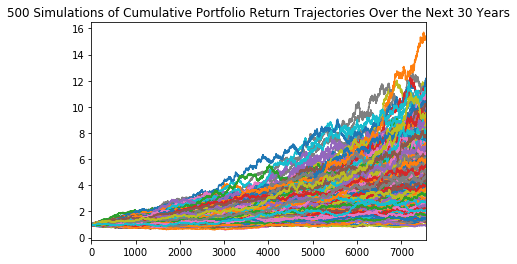

In [14]:
# Visualize the Simulation
plot_title = f"{simulation} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend = None, title = plot_title)


In [15]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30_years = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns_30_years.head()

1    4.992120
2    4.046941
3    5.727263
4    6.094331
5    5.449470
Name: 7560, dtype: float64

In [16]:
# Display the 90% confidence interval for the ending returns at 30 years
confidence_interval_30_years = ending_cumulative_returns_30_years.quantile(q = [0.05, 0.95])
print(confidence_interval_30_years)

0.05    1.924644
0.95    8.748119
Name: 7560, dtype: float64


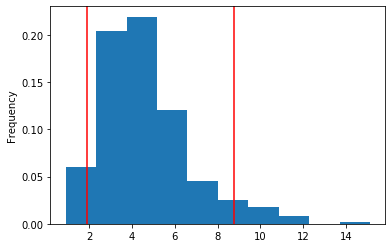

In [17]:
# Visualize the distribution of the ending returns at 30 years with 90% confidence interval
plt.figure();
ending_cumulative_returns_30_years.plot(kind = 'hist', density = True, bins = 10)
plt.axvline(confidence_interval_30_years.iloc[0], color = 'r')
plt.axvline(confidence_interval_30_years.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [18]:
# Calculate expected cumulative returns for 10th, 50th, and 90th percentile
confidence_interval_30_years_10_50_90 = ending_cumulative_returns_30_years.quantile(q = [0.10, 0.50, 0.90])
print(f"Expected Cumulative Returns at 10th percentile: {confidence_interval_30_years_10_50_90.iloc[0]}")
print(f"Expected Cumulative Returns at 50th percentile: {confidence_interval_30_years_10_50_90.iloc[1]}")
print(f"Expected Cumulative Returns at 90th percentile: {confidence_interval_30_years_10_50_90.iloc[2]}")


Expected Cumulative Returns at 10th percentile: 2.429149583259581
Expected Cumulative Returns at 50th percentile: 4.15221305682092
Expected Cumulative Returns at 90th percentile: 7.242723789423931


### Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [19]:
expected_cumulative_return_10th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[0]), 2)
print(f"Expected Portfolio Return of $50,000 at the 10th percentile: ${expected_cumulative_return_10th_percentile}")
expected_cumulative_return_50th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[1]), 2)
print(f"Expected Portfolio Return of $50,000 at the 50th percentile: ${expected_cumulative_return_50th_percentile}")
expected_cumulative_return_90th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[2]), 2)
print(f"Expected Portfolio Return of $50,000 at the 90th percentile: ${expected_cumulative_return_90th_percentile}")



Expected Portfolio Return of $50,000 at the 10th percentile: $121457.48
Expected Portfolio Return of $50,000 at the 50th percentile: $207610.65
Expected Portfolio Return of $50,000 at the 90th percentile: $362136.19


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [20]:
# Set withdrawal rate and calculate income at the 10th percentile 
withdrawal_rate = 0.04
income_at_10th_percentile = round(expected_cumulative_return_10th_percentile * withdrawal_rate, 2)
print(f" Income assuming a 4% withdrawal rate at 10th percentile: ${income_at_10th_percentile}")

 Income assuming a 4% withdrawal rate at 10th percentile: $4858.3


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [21]:
# Calculate income with a 50% increase in the initial investment
expected_portfolio_return_75k_10th_percentile = (75000 * (confidence_interval_30_years_10_50_90.iloc[0]))
income_at_10th_percentile_75k = round(expected_portfolio_return_75k_10th_percentile * withdrawal_rate, 2)
print(f"Income assuming 4% withdrawal rate with $75k initial investment: ${income_at_10th_percentile_75k}")



Income assuming 4% withdrawal rate with $75k initial investment: $7287.45


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

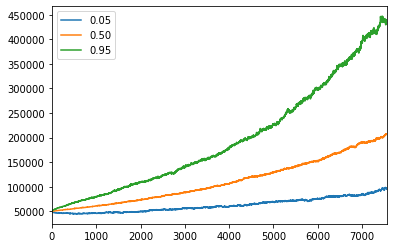

In [22]:
# Created empty lists for quantiles 5th, 50th, and 90th
quantiled_day = 0
list_of_quantiled_days_5th = []
list_of_quantiled_days_50th = []
list_of_quantiled_days_95th = []
# Looped through portfolio_cumulative_returns to get the daily 5th, 50th, and 90th percentile returns.  Appended results to appropriate lists.
for index, row in portfolio_cumulative_returns.iterrows():
    quantiled_day_5th = row.quantile(q = 0.05) * 50000
    quantiled_day_50th = row.quantile(q = 0.50) * 50000
    quantiled_day_95th = row.quantile(q = 0.95) * 50000
    list_of_quantiled_days_5th.append(quantiled_day_5th)
    list_of_quantiled_days_50th.append(quantiled_day_50th)
    list_of_quantiled_days_95th.append(quantiled_day_95th)
# Converted lists to pandas series
cumulative_returns_5th_percentile = pd.Series(list_of_quantiled_days_5th)
cumulative_returns_50th_percentile = pd.Series(list_of_quantiled_days_50th)
cumulative_returns_95th_percentile = pd.Series(list_of_quantiled_days_95th)
# Concatenated pandas series to a dateframe
cumulative_returns_5th_50th_95th_percentile_df = pd.concat([cumulative_returns_5th_percentile,cumulative_returns_50th_percentile,cumulative_returns_95th_percentile], axis = 1)
# Renamed columns
cumulative_returns_5th_50th_95th_percentile_df.rename(columns = {0:'0.05', 1:'0.50', 2:'0.95'}, inplace = True)
# Plot daily returns of 5th, 50th, and 95th percentile
cumulative_returns_5th_50th_95th_percentile_df.plot()


### Additional Optional Challenge - Early Retirement 

Harold was really impressed with your work on this planner, but commented that 30 years seems like such a long time to wait to retire! Harold starts wondering if the retirement plan could be adjusted to retire earlier than normal. Try adjusting the portfolio to either include more risk (a higher stock than bond ratio) or to have a larger initial investment and rerun the retirement analysis to see what it would take to retire in five years instead of 30!



In [67]:
# Setup the Monte Carlo Parameters, Early retirement simulation at 5 years
number_simulations_optional = 500
number_of_trading_days_optional = 252 * 5
monte_carlo_simulated_prices_optional = pd.DataFrame()
portfolio_cumulative_returns_optional = pd.DataFrame()
simulation_optional = 0

In [68]:
# Run the Monte Carlo Simulation using a nested for loop 
for x in range(number_simulations_optional):
    simulated_spy_prices_optional = [spy_last_price]
    simulated_agg_prices_optional = [agg_last_price]
    simulation_optional += 1
    for i in range(number_of_trading_days_optional):
        simulated_spy_price_optional = simulated_spy_prices_optional[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_agg_price_optional = simulated_agg_prices_optional[-1] * (1 + np.random.normal(avg_daily_returns_agg, std_daily_returns_agg))
        
        simulated_spy_prices_optional.append(simulated_spy_price_optional)
        simulated_agg_prices_optional.append(simulated_agg_price_optional)
    
    monte_carlo_simulated_prices_optional['SPY prices'] = pd.Series(simulated_spy_prices_optional)
    monte_carlo_simulated_prices_optional['AGG prices'] = pd.Series(simulated_agg_prices_optional)
    
    simulated_daily_returns_optional = monte_carlo_simulated_prices_optional.pct_change()
    
    weights_optional = [0.60,0.40]
    
    portfolio_daily_returns_optional = simulated_daily_returns_optional.dot(weights)
    
    portfolio_cumulative_returns_optional[simulation_optional] = (1 + portfolio_daily_returns_optional.fillna(0)).cumprod()
 
portfolio_cumulative_returns_optional.head()


,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996511,0.999739,1.001024,1.001268,1.003337,1.003308,0.998750,1.002556,1.004655,1.000754,...,0.994853,1.001151,0.996321,0.997295,0.995338,1.008703,0.997358,0.993963,0.998557,0.995204
2,0.989809,0.996637,0.997394,0.990672,0.999442,1.023041,0.994067,0.998097,1.006075,0.999756,...,0.984074,0.996477,1.002818,0.988503,0.998147,1.014409,0.991959,0.999787,0.999722,0.991493
3,0.995529,0.990169,1.003275,0.989509,0.996016,1.033160,1.001633,0.992230,1.016522,1.007094,...,0.980967,0.994214,0.989273,0.983148,1.000505,1.010986,0.991602,1.003931,0.998223,0.989234
4,0.997429,0.995262,1.012672,0.989039,0.992746,1.028872,1.002059,0.998438,1.019562,1.015628,...,0.980061,0.998435,0.994896,0.981329,1.001339,1.014061,0.993881,1.006100,0.992154,0.985222


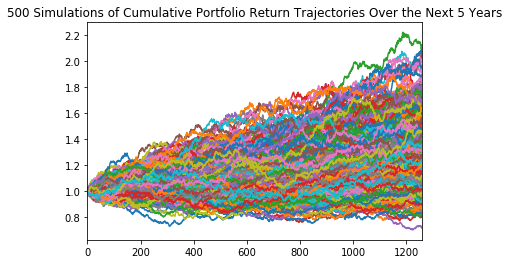

In [74]:
# Visualize the Simulation
plot_title_optional = f"{simulation_optional} Simulations of Cumulative Portfolio Return Trajectories Over the Next 5 Years"
portfolio_cumulative_returns_optional.plot(legend = None, title = plot_title_optional)

In [70]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_optional = portfolio_cumulative_returns_optional.iloc[-1,:]
ending_cumulative_returns_optional.head()

1    1.208650
2    1.462106
3    1.160773
4    1.314564
5    1.348167
Name: 1260, dtype: float64

In [71]:
# Calculate expected cumulative returns for 10th percentile
confidence_interval_optional = ending_cumulative_returns_optional.quantile(q = 0.10)

In [81]:
# Expected cumulative return on $190k initial investment
expected_cumulative_return_10th_percentile_optional= round(190000 * (confidence_interval_optional), 2)


In [82]:
# Set withdrawal rate and calculate income at the 10th percentile 
withdrawal_rate = 0.04
income_at_10th_percentile_optional = round(expected_cumulative_return_10th_percentile_optional * withdrawal_rate, 2)
print(f" Income assuming a 4% withdrawal rate at 10th percentile: ${income_at_10th_percentile_optional}")

 Income assuming a 4% withdrawal rate at 10th percentile: $7497.5
